# Data collection and statistics for relevant sentences
We want the final answer extractor to output answers and a set of sentences from the context that are relevant for the given question/answer pair. Thus, in the training data we want both the correct answer (which we have) and the set of sentences that are relevant for the answer. This notebook does two things:
1. For the given dataset, for each text-object it extracts the sentences that are relevant for the question/answer pair
    1. A sentence is deemed relevant if there is word overlap between the sentence and the answer/question.
    1. Possible to do some simpler inference here, to deem other sentences relevant (at a later stage)
1. Provide some statistics and categorization of the data, based on how many sentences are relevant to the quetion/answer

In [14]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# load the original data
df_word_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/word.pkl")
df_word_stop_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/word_stop.pkl")
df_lemma_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/lemma.pkl")
df_lemma_stop_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/lemma_stop.pkl")

In [16]:
# load the cleaned data
df_word = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/word.pkl")
df_word_stop = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/word_stop.pkl")
df_lemma = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/lemma.pkl")
df_lemma_stop = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/lemma_stop.pkl")

In [56]:
def plot_question_type_stats(values, title):
    values.sort()
    values_str = [str(val) for val in values]
    plt.hist(values_str, color='teal')
    plt.title(title)
    plt.show()

def plot_question_type_stats_num(values, title, bins=10):
    min = np.min(values)
    max = np.max(values)
    print('min: ', min)
    print('max: ', max)
    bins = list(range(min, max))
    plt.hist(values, color='rebeccapurple', bins=bins)
    plt.title(title)
    plt.show()

def plot_proximity_stats(values, names, title, bins=10, colors=['darkslategray', 'teal', 'darkturquoise']):
    min = np.min(values)
    max = np.max(values)
    print('min: ', min)
    print('max: ', max)
    # bins = list(range(min, max))
    plt.hist(values, color=colors, bins=bins, label=names)
    plt.title(title)
    plt.legend()
    plt.show()


In [57]:
# plot sentence statistics for the original dataset
def display_sentence_statistics(df, title=''):
    # have to make copy!! otherwise it sorts the col in place in the df..
    df_c = df.copy()
    overlap_values = df_c['overlap_class'].values

    plot_question_type_stats(overlap_values, 'Question distribution '+title)

    df_class_1 = df.loc[df['overlap_class'] == 1]
    df_class_2 = df.loc[df['overlap_class'] == 2]
    df_class_3 = df.loc[df['overlap_class'] == 3]

    # plot the number of relevant sentences for each of the question types
    plot_question_type_stats_num(df_class_1['num_overlap_sentences'].values, 'Number of relevant sentences for question type 1', None)
    plot_question_type_stats_num(df_class_2['num_overlap_sentences'].values, 'Number of relevant sentences for question type 2', None)
    plot_question_type_stats_num(df_class_3['num_overlap_sentences'].values, 'Number of relevant sentences for question type 3', None)



    return overlap_values, [df_class_1, df_class_2, df_class_3]



In [61]:
def plot_overlap_comparison(values):
    names = ['words', 'words stop', 'lemmas', 'lemmas stop']
    colors = ['darkslategray', 'teal', 'darkturquoise', 'slategray']
    title = 'data class comparison'
    plot_proximity_stats(values, names, title, None, colors)

def plot_cleaned_class_comparison(values):
    names = ['original', 'cleaned']
    colors = ['teal', 'rebeccapurple']
    title = 'original vs cleaned data comparison'
    plot_proximity_stats(values, names, title, None, colors)

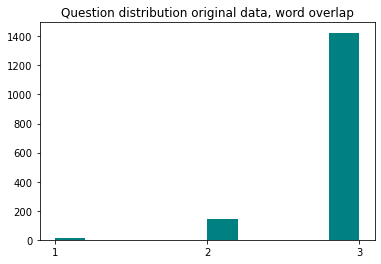

min:  1
max:  17


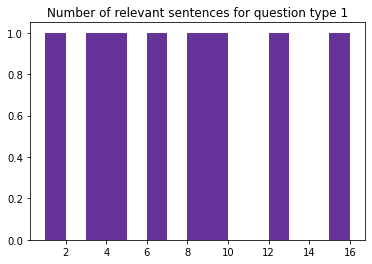

min:  2
max:  201


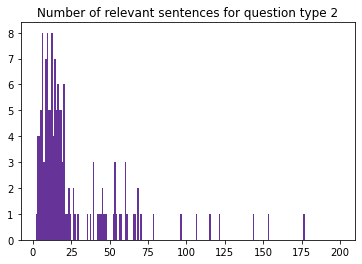

min:  1
max:  217


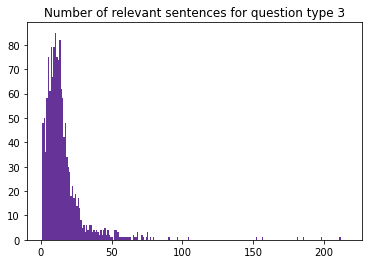

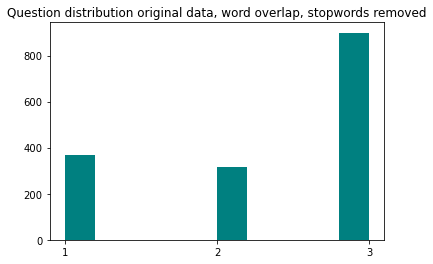

min:  1
max:  33


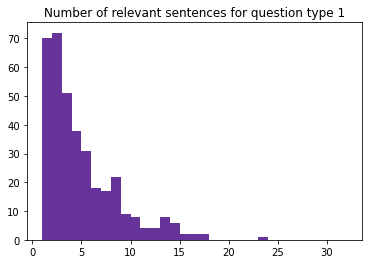

min:  2
max:  59


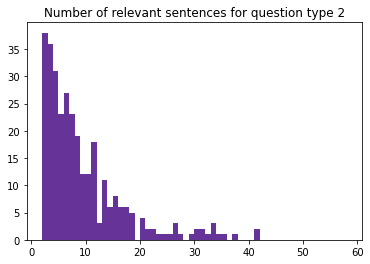

min:  1
max:  78


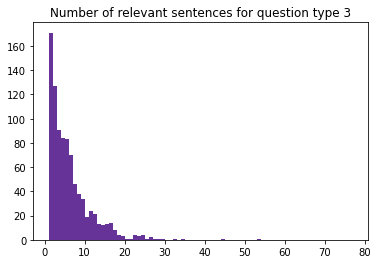

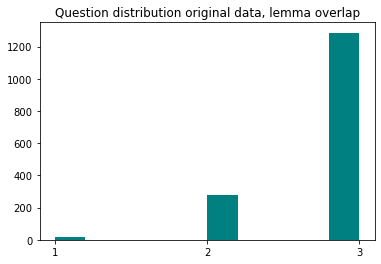

min:  1
max:  22


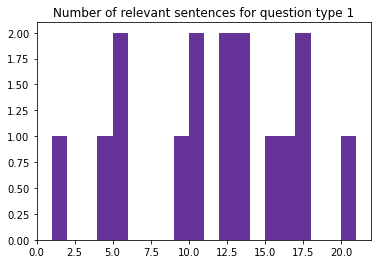

min:  2
max:  236


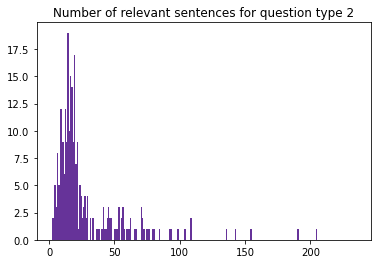

min:  1
max:  230


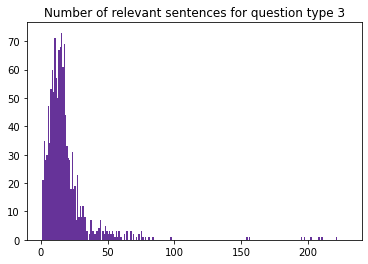

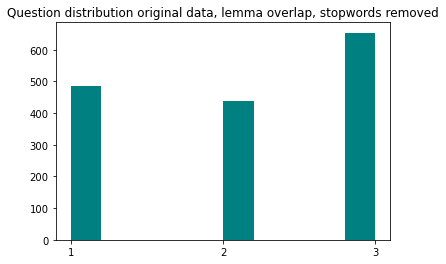

min:  1
max:  51


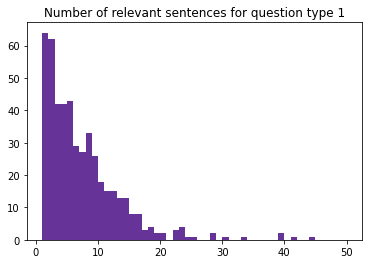

min:  2
max:  72


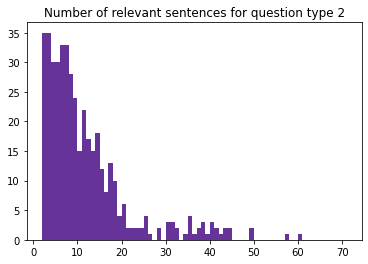

min:  1
max:  97


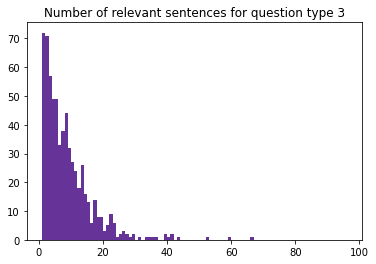

In [62]:
# compute stats for the original dataset
overlap_values_word_o, df_word_class_vals_o = display_sentence_statistics(df_word_o, 'original data, word overlap')
overlap_values_word_stop_o, df_word_stop_class_vals_o = display_sentence_statistics(df_word_stop_o, 'original data, word overlap, stopwords removed')
overlap_values_lemma_o, df_lemma_class_vals_o = display_sentence_statistics(df_lemma_o, 'original data, lemma overlap')
overlap_values_lemma_stop_o, df_lemma_stop_class_vals_o = display_sentence_statistics(df_lemma_stop_o, 'original data, lemma overlap, stopwords removed')

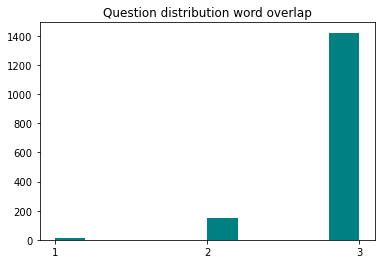

min:  1
max:  17


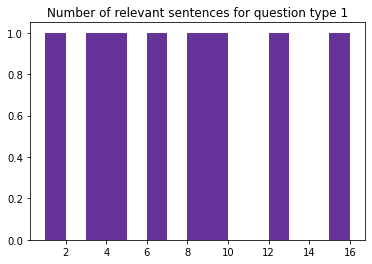

min:  2
max:  201


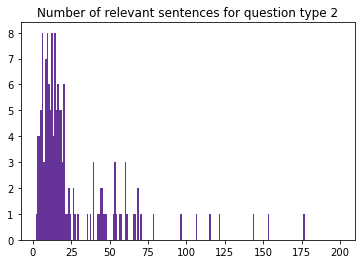

min:  1
max:  217


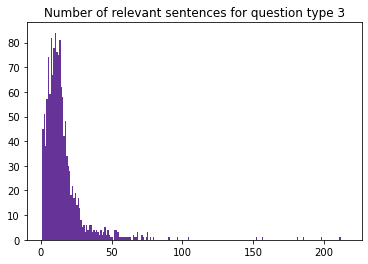

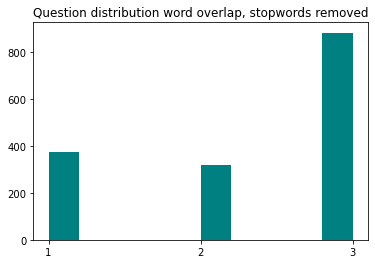

min:  1
max:  33


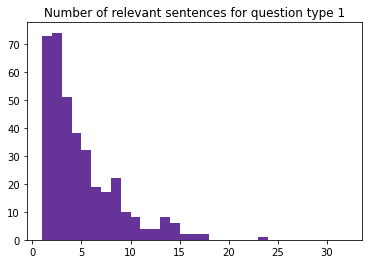

min:  2
max:  59


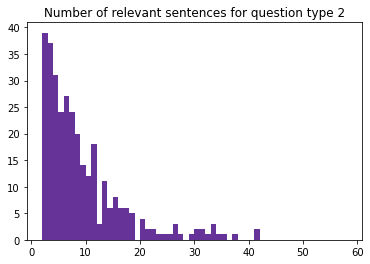

min:  1
max:  78


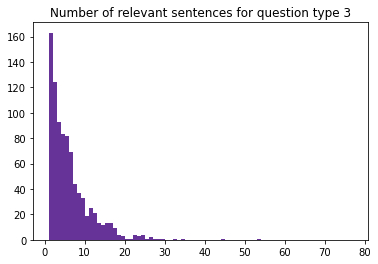

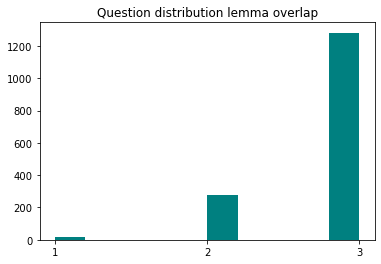

min:  1
max:  22


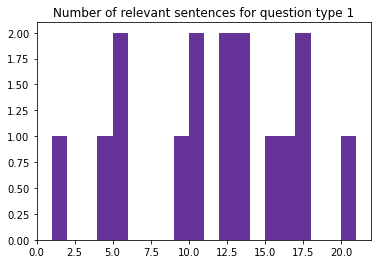

min:  2
max:  236


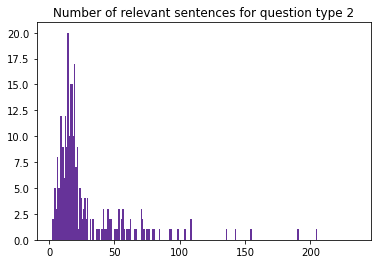

min:  1
max:  230


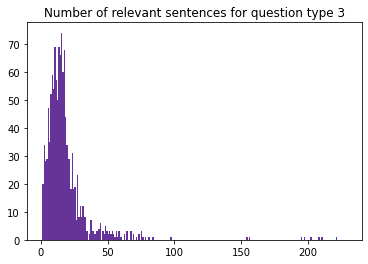

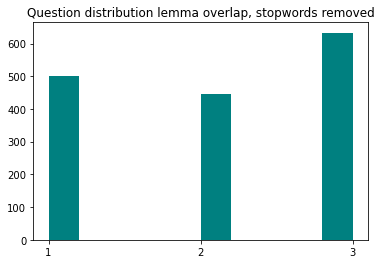

min:  1
max:  51


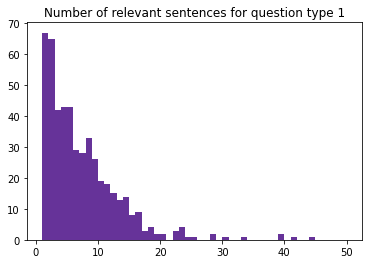

min:  2
max:  72


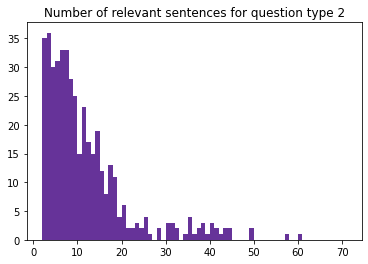

min:  1
max:  97


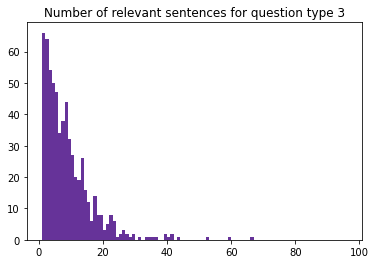

min:  1
max:  3


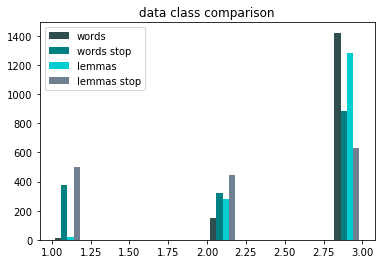

In [63]:
overlap_values_word, df_word_class_vals = display_sentence_statistics(df_word, 'word overlap')
overlap_values_word_stop, df_word_stop_class_vals = display_sentence_statistics(df_word_stop, 'word overlap, stopwords removed')
overlap_values_lemma, df_lemma_class_vals = display_sentence_statistics(df_lemma, 'lemma overlap')
overlap_values_lemma_stop, df_lemma_stop_class_vals = display_sentence_statistics(df_lemma_stop, 'lemma overlap, stopwords removed')

values = [overlap_values_word, overlap_values_word_stop, overlap_values_lemma, overlap_values_lemma_stop]
plot_overlap_comparison(values)


min:  1
max:  3


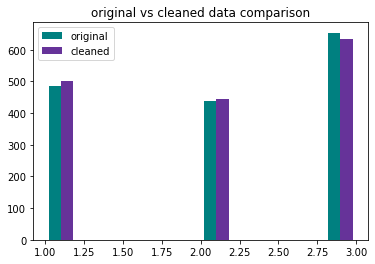

In [64]:
values = [overlap_values_lemma_stop_o, overlap_values_lemma_stop]
plot_cleaned_class_comparison(values)

In [65]:
# print some examples from each of the data classes:
def save_sentence_statistics(filename, df, type, title):
    with open(filename, 'w') as out:
        out.write(title+ '\n')
        for index, row in df.iterrows():
            out.write('-------------------'+ '\n')
            out.write('question, parsed: ' + ' '.join(row['q_'+type]) + '\n')
            out.write('question, original: ' + ' '.join(row['q_original']) + '\n')
            out.write('missing words context: ' + ' '.join(row['missing_words_context']) + '\n')
            out.write('sentence with answer, parsed: ' + ' '.join(row['sent_'+type]) + '\n')
            out.write('sentence with answer, original: ' + ' '.join(row['sent_original']) + '\n')
            out.write('overlap class: ' + str(row['overlap_class']) + '\n')
            relevant_sentences = row['matching_original_sentences']
            out.write('matching sentences, original: \n')
            for sent in relevant_sentences:
                out.write(sent + '\n')

In [66]:
save_sentence_statistics('../figures/relevant_sentences/relevant-sentences-lemma-stop_top_3.txt', df_lemma_stop, 'stop_lemmas', 'Relevant sentences for questions in dataset. Statistics for lemma with stopwords removed.')

In [67]:
save_sentence_statistics('../figures/relevant_sentences/relevant-sentences-word-stop.txt', df_word_stop, 'stop_words', 'Relevant sentences for questions in dataset. Statistics for words with stopwords removed.')

In [68]:
# calculate the 25-th percentile of number of relevant sentences
print(np.percentile(df_lemma_stop['num_overlap_sentences'].values, 25))

3.0


In [69]:
# compare sorted / unsorted relevant sentences
def save_ranked_sentence_statistics(filename, df, type, title):
    with open(filename, 'w') as out:
        out.write(title+ '\n')
        for index, row in df.iterrows():
            out.write('-------------------'+ '\n')
            out.write('overlap class: ' + str(row['overlap_class']) + '\n')
            out.write('question, parsed: ' + ' '.join(row['q_'+type]) + '\n')
            out.write('question, original: ' + ' '.join(row['q_original']) + '\n')
            out.write('missing words context: ' + ' '.join(row['missing_words_context']) + '\n')
            out.write('sentence with answer, parsed: ' + ' '.join(row['sent_'+type]) + '\n')
            out.write('sentence with answer, original: ' + ' '.join(row['sent_original']) + '\n')
            relevant_sentences = row['matching_original_sentences']
            ranked_relevant_sentences = row['ranked_matching_original_sentences']
            out.write('top 3 matching sentences: \n')
            max = 3
            if len(relevant_sentences) < max:
                max = len(relevant_sentences)
            for sent in relevant_sentences[:max]:
                out.write(sent + '\n')
            out.write('top RANKED matching sentences: \n')
            for sent in ranked_relevant_sentences[:max]:
                out.write(sent + '\n')

In [70]:
save_ranked_sentence_statistics('../figures/relevant_sentences/ranked-relevant-sentences-lemma-stop.txt', df_lemma_stop, 'stop_lemmas', 'Ranked relevant sentences for questions in dataset. Statistics for lemma with stopwords removed.')

In [77]:
def plot_proximity_stats(values, names, title, bins=10):
    colors = ['darkslategray', 'teal', 'darkturquoise']
    bins = list(range(-1, 21))
    plt.hist(values, color=colors, bins=bins, label=names)
    plt.title(title)
    plt.legend()
    plt.show()

In [78]:
# create some statistics for how close to the sentence containing the answer, the relevant sentences are
def extract_proximity_of_ranked_relevant_sentences(df):
    top_ranked_sentence_diff = []
    for index, row in df.iterrows():
        matching_sent_ids = list(row['matching_sentence_ids'])
        ranked_matching_sent_ids = list(row['matching_sentence_ids'])
        sent_with_ans = matching_sent_ids[0]
        top_ranked_sent = ranked_matching_sent_ids[0]
        if sent_with_ans == top_ranked_sent and len(ranked_matching_sent_ids) > 1:
            top_ranked_sent = ranked_matching_sent_ids[1]
        else: # if there are no other sentences than the sentence containing the answer
            top_ranked_sent = None
        diff = -1
        if top_ranked_sent:
            diff = np.abs(sent_with_ans - top_ranked_sent)
            if diff > 20:
               diff = 20
        top_ranked_sentence_diff.append(diff)
    return top_ranked_sentence_diff

min:  -1
max:  20


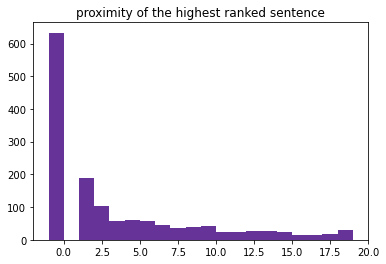

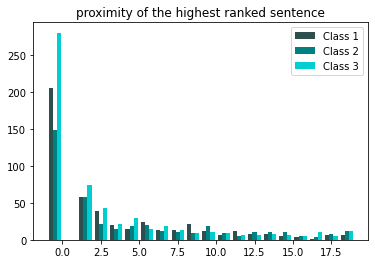

In [79]:
diff_arr = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop)
plot_question_type_stats_num(diff_arr, 'proximity of the highest ranked sentence')

diff_arr_1 = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop_class_vals[0])
diff_arr_2 = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop_class_vals[1])
diff_arr_3 = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop_class_vals[2])

names = ['Class 1', 'Class 2', 'Class 3']
plot_proximity_stats([diff_arr_1, diff_arr_2, diff_arr_3], names, 'proximity of the highest ranked sentence')